<a href="https://colab.research.google.com/github/LUCKY1404/CodSoft/blob/main/Credit_Card_Fraud_Detection/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the train dataset

In [3]:
train_df=pd.read_csv("/content/fraudTrain.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


Loading the test dataset

In [4]:
test_df=pd.read_csv("/content/fraudTest.csv")
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


Concatenating the train and test data

In [5]:
combined_df=pd.concat([train_df, test_df], ignore_index=True)
data=combined_df

visualizing the shape of the dataset

In [6]:
data.shape

(50600, 23)

Detecting the missing values in the dataset

In [7]:
data.isna().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                    True
merchant                  True
category                  True
amt                       True
first                     True
last                      True
gender                    True
street                    True
city                      True
state                     True
zip                       True
lat                       True
long                      True
city_pop                  True
job                       True
dob                       True
trans_num                 True
unix_time                 True
merch_lat                 True
merch_long                True
is_fraud                  True
dtype: bool

Removing the missing values

In [16]:
data.dropna()
data.dropna(inplace= True)

In [17]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No. of Fraud Transaction

In [18]:
data['is_fraud'].value_counts()

0.0    50331
1.0      267
Name: is_fraud, dtype: int64

Data Visualization

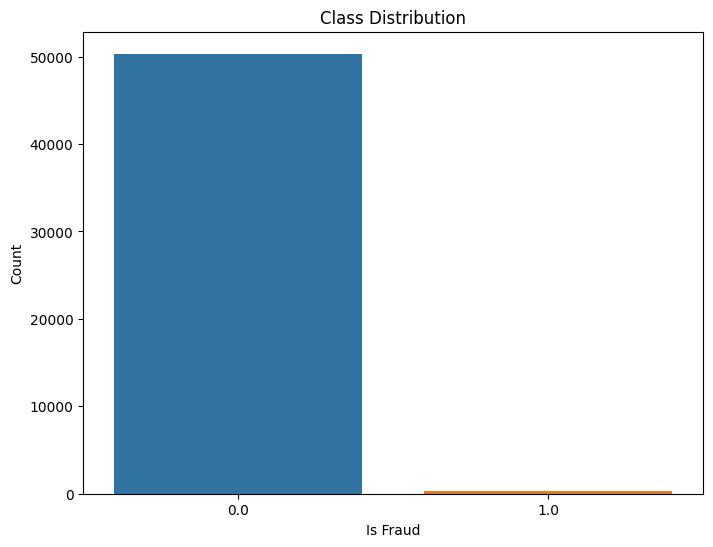

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=data)
plt.title('Class Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

Data Preprocessing

In [21]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['month'] = data['trans_date_trans_time'].dt.month
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num'], axis=1)
data = pd.get_dummies(data, columns=['category'], drop_first=True)


data['gender'] = data['gender'].map({'M': 0, 'F': 1})


X = data.drop(['is_fraud'], axis=1)

scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


Looking for outliers in the data

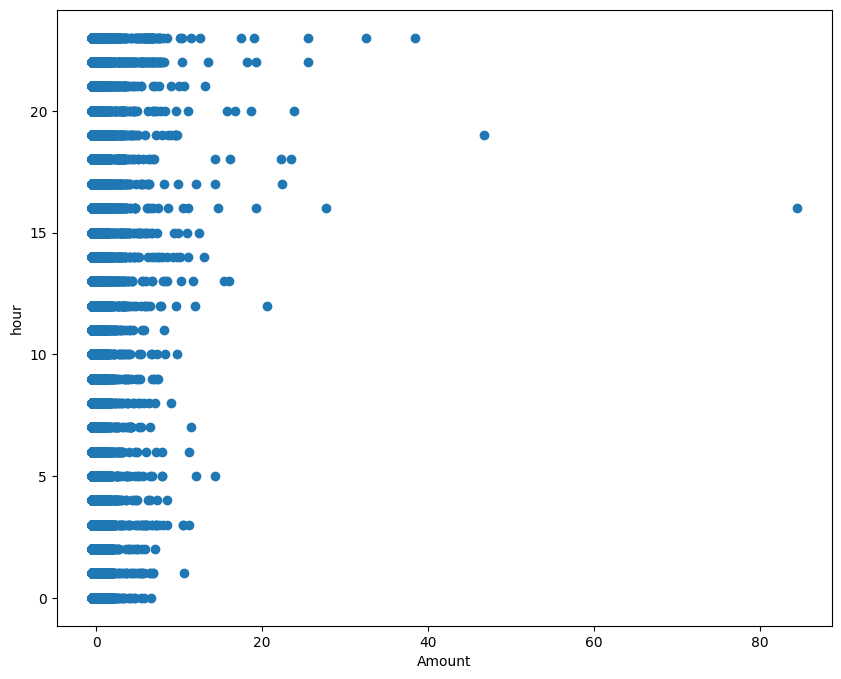

In [32]:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(X['amt'], X['hour'])
ax.set_xlabel('Amount')
ax.set_ylabel('hour')
plt.show()


In [35]:
fraud=data[data.is_fraud==1]
genuine=data[data.is_fraud==0]
print(fraud.shape)
print(genuine.shape)

(267, 26)
(50331, 26)


Staistical measures

In [37]:
genuine.amt.describe()

count    50331.000000
mean        67.197596
std        132.965980
min          1.000000
25%          9.570000
50%         46.930000
75%         82.430000
max      11872.210000
Name: amt, dtype: float64

In [38]:
fraud.amt.describe()


count     267.000000
mean      541.356404
std       387.304748
min         4.500000
25%       277.045000
50%       368.430000
75%       901.535000
max      1254.270000
Name: amt, dtype: float64

Undersampling

In [39]:
genuine_sample= genuine.sample(n=267)
new_d=pd.concat([genuine_sample,fraud],axis=0)

In [40]:
new_d.head()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
15791,4.044437e+18,72.09,1,39.8355,-84.2613,479994.0,1.326175e+09,39.067476,-84.171490,0.0,...,0,0,0,0,0,0,0,0,0,0
23830,3.708775e+14,31.23,1,36.2017,-81.1286,21134.0,1.371915e+09,36.595262,-80.781926,0.0,...,0,1,0,0,0,0,0,0,0,0
17048,4.191109e+15,96.60,1,39.6251,-82.7552,4512.0,1.326257e+09,40.363016,-82.980263,0.0,...,0,0,0,0,0,0,0,0,0,0
4541,4.908846e+15,38.72,1,32.2779,-97.2351,5875.0,1.325623e+09,33.090575,-97.560922,0.0,...,0,0,1,0,0,0,0,0,0,0
42525,4.383521e+12,47.83,0,39.9347,-86.1633,910148.0,1.372490e+09,38.948815,-86.571985,0.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_d['is_fraud'].value_counts()


0.0    267
1.0    267
Name: is_fraud, dtype: int64

In [43]:
new_d.groupby('is_fraud').mean()

,cc_num,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,hour,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
is_fraud,,,,,,,,,,,,,,,,,,,,,
0.0,3.254257e+17,61.702060,0.539326,38.899945,-90.530837,89193.921348,1.355037e+09,38.877323,-90.517717,12.872659,...,0.082397,0.063670,0.082397,0.089888,0.029963,0.067416,0.086142,0.097378,0.101124,0.029963
1.0,2.870269e+17,541.356404,0.621723,39.912643,-89.478434,109088.917603,1.349416e+09,39.906892,-89.441685,13.232210,...,0.269663,0.033708,0.018727,0.018727,0.123596,0.026217,0.014981,0.239700,0.101124,0.022472


Splitting the dataset in train, test and validaton data

In [44]:
x=new_d.drop(['is_fraud'],axis=1)
y=new_d['is_fraud']
xtrain,xtest,ytrain ,ytest= train_test_split(x,y,test_size=0.2, random_state= 2)
print(x.shape, xtrain.shape, xtest.shape)

(534, 25) (427, 25) (107, 25)


## Logistic Regression

Training the model

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

Finding the Accuracy

In [51]:
y_pred = model.predict(xtest)
accuracy=model.score(xtest,ytest)
print(accuracy)
print('Accuracy score of the Logistic Regression Model : ' , accuracy*100, '%')

0.4953271028037383
Accuracy score of the Logistic Regression Model :  49.532710280373834 %


Finding the Confusion Matrix

In [49]:
from sklearn import metrics
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[53  0]
 [54  0]]


# Random Forest Classifer

Fitting Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [54]:
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy', random_state=0,max_depth=10)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=20,
                       random_state=0)

In [55]:
y_pred = classifier.predict(xtest)

Claasification report and confusion matrix

In [56]:
from sklearn.metrics import  classification_report, confusion_matrix
print('Classifcation report:\n', classification_report(ytest, y_pred))
conf_mat = confusion_matrix(y_true=ytest, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        53
         1.0       0.98      0.98      0.98        54

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107

Confusion matrix:
 [[52  1]
 [ 1 53]]


Accuracy

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,y_pred)

In [62]:
print('Accuracy score of the Random Forest Classifier :' , accuracy*100, '%')

Accuracy score of the Random Forest Classifier : 98.13084112149532 %
